<a href="https://www.kaggle.com/code/vyom9670k/4-netflix-stock-market-analysis-using-lstm?scriptVersionId=111682637" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Netflix Stock Market Analysis Using LSTM [Long Sort Term Memory]** 


In the current project making, data analysis by using the Netflix data set downloaded from the Tiingo Crypto database. Tigo Crypto provides an uder API key to retrieve the data from the database. Here we will learn how to use the python kaggle interface using the python inbuild library like pandas, NumPy, matplotlib, Plotly, Sklearn, and Seaborn. Here, the panda is used to get information from the get informtion from the dataset, matplotlib. pyplot and seaborn for data visualization, and NumPy for mathematical operation. Stock market prediction or future forecasting can be performed by several models and methods; however, we use the Recurrent Neural Network[RNN]  with Long Sort Term memory LSTM.


### Here we will try to answer the following question:
1. What was the change in price over time, along with visualization time vs. Stock price?
2. What is the expected daily return on the investment?
3. What is the Correlation between the different features?
4. In which month of any year from 2007 to 2022 is the shareholder more active in purchasing and selling the share?
4. In which Month over the past year is stock selling at its maximum volume?
5. What is the Relation between the sudden fall in the stock price and volume?
5. How much value is put on risk analysis based on percentage?
6. How and we attempt the future prediction of the given information?
* [Present analysis is mainly focused on the closing price of the stock ]

## Importing the usefull library

In [1]:
import numpy as np                # linear algebra
import pandas as pd               # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas_datareader as pdr   # Pandas Data frame Data reader
import matplotlib.pyplot as plt   # Basic Library data visualization
import seaborn as sns             # Visualization library
# Importing eixting Dataset into the API
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import plotly.express as px       # # Advance Visualization library
import plotly.offline as pyo       # For creating a offline plot
from plotly.offline import iplot   

## Setup the Plot Background

In [3]:
from matplotlib.pyplot import rcParams
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.linestyle'] = '-'
plt.rcParams['xtick.labelsize']= 18
plt.rcParams['ytick.labelsize']= 16
plt.rcParams['axes.facecolor'] = 'white'

## Data Preprocessing

### Importing the Dataset usng Tiingo crypto
1. pdr - Reffer as Pandas Data reader
2. Start date time means from which date to till now day data you want to retrive ?
3. Here we use the data from 01 jan 2007  to today

In [4]:
df = pdr.get_data_tiingo("NFLX",api_key= "a142e2c0f46165696e067452adcf39d8433c5055",start = "10-01-07 00:00:00")
df

/opt/conda/lib/python3.7/site-packages/pandas_datareader/tiingo.py:234: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



close    high     low    open    volume  \
symbol date                                                                  
NFLX   2007-10-01 00:00:00+00:00   21.22   21.40   20.59   20.70   1361200   
       2007-10-02 00:00:00+00:00   21.20   21.33   20.76   21.25    646100   
       2007-10-03 00:00:00+00:00   21.08   21.28   20.80   21.02    516100   
       2007-10-04 00:00:00+00:00   21.14   21.27   20.77   20.88    699700   
       2007-10-05 00:00:00+00:00   22.00   22.22   21.20   21.23    935600   
...                                  ...     ...     ...     ...       ...   
       2022-11-14 00:00:00+00:00  299.27  311.00  288.19  290.00  17973398   
       2022-11-15 00:00:00+00:00  310.20  312.71  302.55  309.20  14626932   
       2022-11-16 00:00:00+00:00  306.02  310.49  303.61  309.94   8038556   
       2022-11-17 00:00:00+00:00  295.28  299.82  291.00  294.72   9838220   
       2022-11-18 00:00:00+00:00  287.98  298.00  287.00  297.33   8400108   

                                    adjClose     adjHigh      adjLow  \
symbol date                                                            
NFLX   2007-10-01 00:00:00+00:00    3.031426    3.057140    2.941426   
       2007-10-02 00:00:00+00:00    3.028568    3.047140    2.965711   
       2007-10-03 00:00:00+00:00    3.011426    3.039997    2.971426   
       2007-10-04 00:00:00+00:00    3.019997    3.038568    2.967140   
       2007-10-05 00:00:00+00:00    3.142854    3.174283    3.028568   
...                                      ...         ...         ...   
       2022-11-14 00:00:00+00:00  299.270000  311.000000  288.190000   
       2022-11-15 00:00:00+00:00  310.200000  312.710000  302.550000   
       2022-11-16 00:00:00+00:00  306.020000  310.490000  303.610000   
       2022-11-17 00:00:00+00:00  295.280000  299.820000  291.000000   
       2022-11-18 00:00:00+00:00  287.980000  298.000000  287.000000   

                                     adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                    
NFLX   2007-10-01 00:00:00+00:00    2.957140    9528409      0.0          1.0  
       2007-10-02 00:00:00+00:00    3.035711    4522704      0.0          1.0  
       2007-10-03 00:00:00+00:00    3.002854    3612703      0.0          1.0  
       2007-10-04 00:00:00+00:00    2.982854    4897904      0.0          1.0  
       2007-10-05 00:00:00+00:00    3.032854    6549206      0.0          1.0  
...                                      ...        ...      ...          ...  
       2022-11-14 00:00:00+00:00  290.000000   17973398      0.0          1.0  
       2022-11-15 00:00:00+00:00  309.200000   14626932      0.0          1.0  
       2022-11-16 00:00:00+00:00  309.940000    8038556      0.0          1.0  
       2022-11-17 00:00:00+00:00  294.720000    9838220      0.0          1.0  
       2022-11-18 00:00:00+00:00  297.330000    8400108      0.0          1.0  

[3813 rows x 12 columns]

In [5]:
df.reset_index(inplace = True)           # Reset the index and covert date as index  
df0 = df.drop(columns= "symbol")         # Removing the Symbol comluns 
df0["date"] = pd.to_datetime(df0["date"]).dt.date

In [6]:
df2 = df0.set_index("date")
df_copy =df2.copy()
df2.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2007-10-01,21.22,21.40,20.59,20.70,1361200,3.031426,3.057140,2.941426,2.957140,9528409,0.0,1.0
2007-10-02,21.20,21.33,20.76,21.25,646100,3.028568,3.047140,2.965711,3.035711,4522704,0.0,1.0
2007-10-03,21.08,21.28,20.80,21.02,516100,3.011426,3.039997,2.971426,3.002854,3612703,0.0,1.0
2007-10-04,21.14,21.27,20.77,20.88,699700,3.019997,3.038568,2.967140,2.982854,4897904,0.0,1.0
2007-10-05,22.00,22.22,21.20,21.23,935600,3.142854,3.174283,3.028568,3.032854,6549206,0.0,1.0


### Checking Missing value

In [7]:
def check_missing(data) :
    return data.isnull().sum()/df.shape[0]*100

check_missing(df2)

close          0.0
high           0.0
low            0.0
open           0.0
volume         0.0
adjClose       0.0
adjHigh        0.0
adjLow         0.0
adjOpen        0.0
adjVolume      0.0
divCash        0.0
splitFactor    0.0
dtype: float64

### About Dataset

1. Loaded Dataset for Netflix streaming service company 
2. Netflix dataset downloaded from Tiingle Cryon, s o data have only 8 months missing value from Jan 2007 to Sep 2007  
2. Complete Dataset consists of 3803 rows and 12 columns 
3. Dataset have no missing value
4. each column have term as:  **close      ,high  ,low   ,open  ,volume     ,adjClose   ,adjHigh    ,adjLow     ,adjOpen    ,adjVolume  ,divCash    ,splitFactor**
* Open Price  :- It is the price at which the financial security opens in the market when trading begins.
* Close Price :-  The close is a reference to the end of a trading session in the financial markets when the markets close for the day.
* Low Price    :- Today's low is the lowest price that a stock trades in that day
* High price   :- Today's high refers to a security's intraday highest trading price.
* Volume       :- stock trading volume would refer to the number of shares of a security traded between its daily open and close. [source : wikipedia]
* adjClose     :- The adjusted closing price factors in corporate actions, such as stock splits, dividends, and rights offerings.
* DivCash      :- Cash dividends are a common way for companies to return capital to their shareholders in the form of periodic cash payments—typically, quarterly—but some stocks may pay these bonuses on a monthly, annual, or semiannual basis. 
* In company there is no cash divedent between comapnay and thier partner 
* splitFactor  :- A stock split increases the number of outstanding shares and also affects the share price by a certain fraction. company do this to keep their stock price affordable so more investors can buy shares   [source : Invetopedia]
* Dataset contains Several columns such as closing price, opening price, volume, etc.
* Data storage take takes zero kb storage because it is directly loaded from the Tiingle database using an API key

### Type of Dataset

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3813 entries, 2007-10-01 to 2022-11-18
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   close        3813 non-null   float64
 1   high         3813 non-null   float64
 2   low          3813 non-null   float64
 3   open         3813 non-null   float64
 4   volume       3813 non-null   int64  
 5   adjClose     3813 non-null   float64
 6   adjHigh      3813 non-null   float64
 7   adjLow       3813 non-null   float64
 8   adjOpen      3813 non-null   float64
 9   adjVolume    3813 non-null   int64  
 10  divCash      3813 non-null   float64
 11  splitFactor  3813 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 387.3+ KB


<AxesSubplot:>

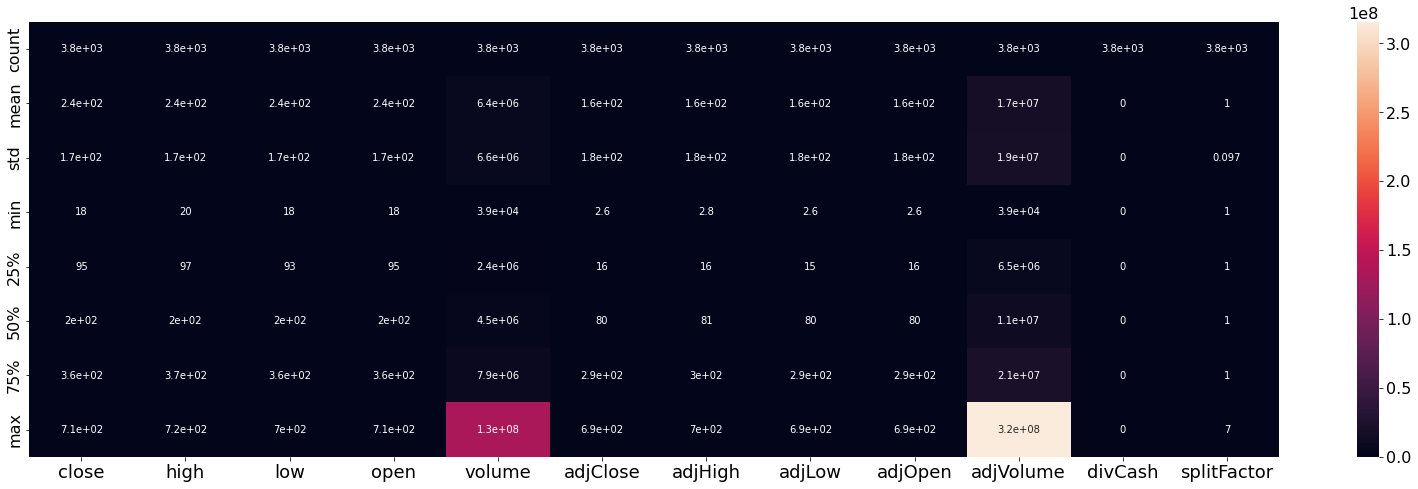

In [9]:
plt.figure(figsize = (28,8))
sns.heatmap(df2.describe() ,annot=True)

In [10]:
df2.keys()

Index(['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh',
       'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

### [1] Visualization of Closing Price of Netflix dataset

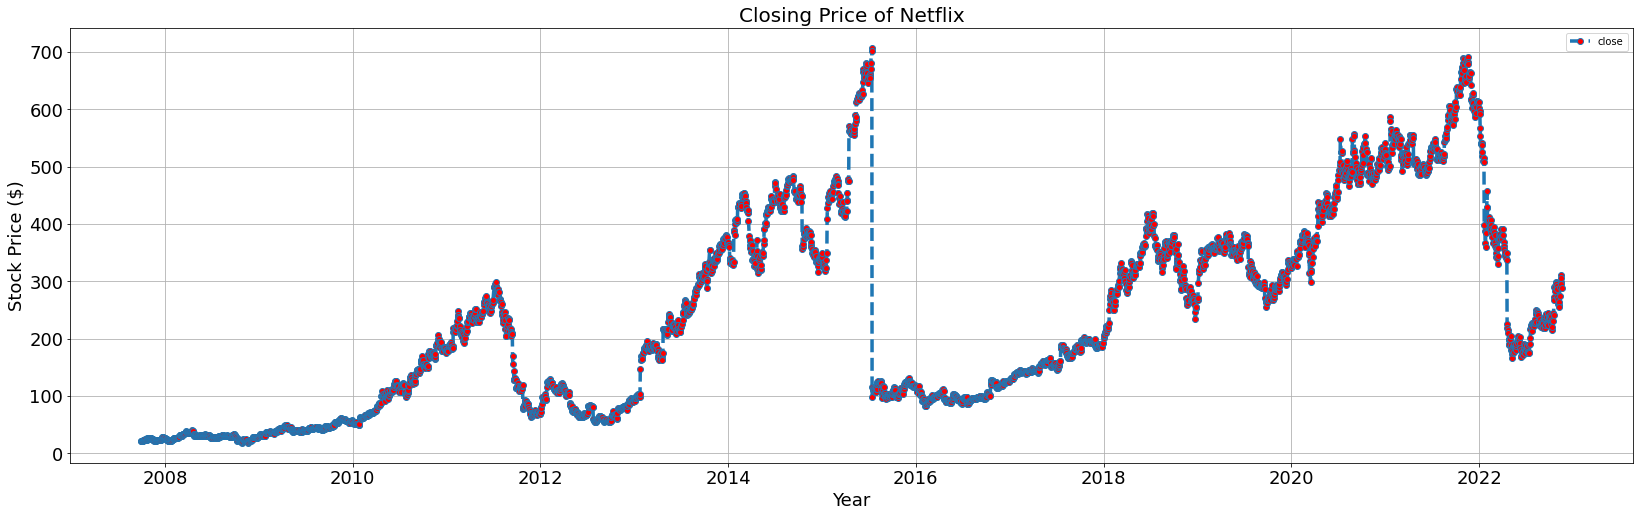

In [11]:
df2[['close']].plot(figsize = (28,8),linewidth = 3.5 , legend="Closing price",fontsize = 18, linestyle='--', marker='o', markerfacecolor='r')
plt.title("Closing Price of Netflix",fontsize = 20)
# plt.legend("Closing Price",fontsize = 18)
plt.xlabel("Year",fontsize = 18)
plt.ylabel("Stock Price ($)",fontsize = 18)
plt.grid()
plt.show()

### [2] Total volume of stock being traded each day

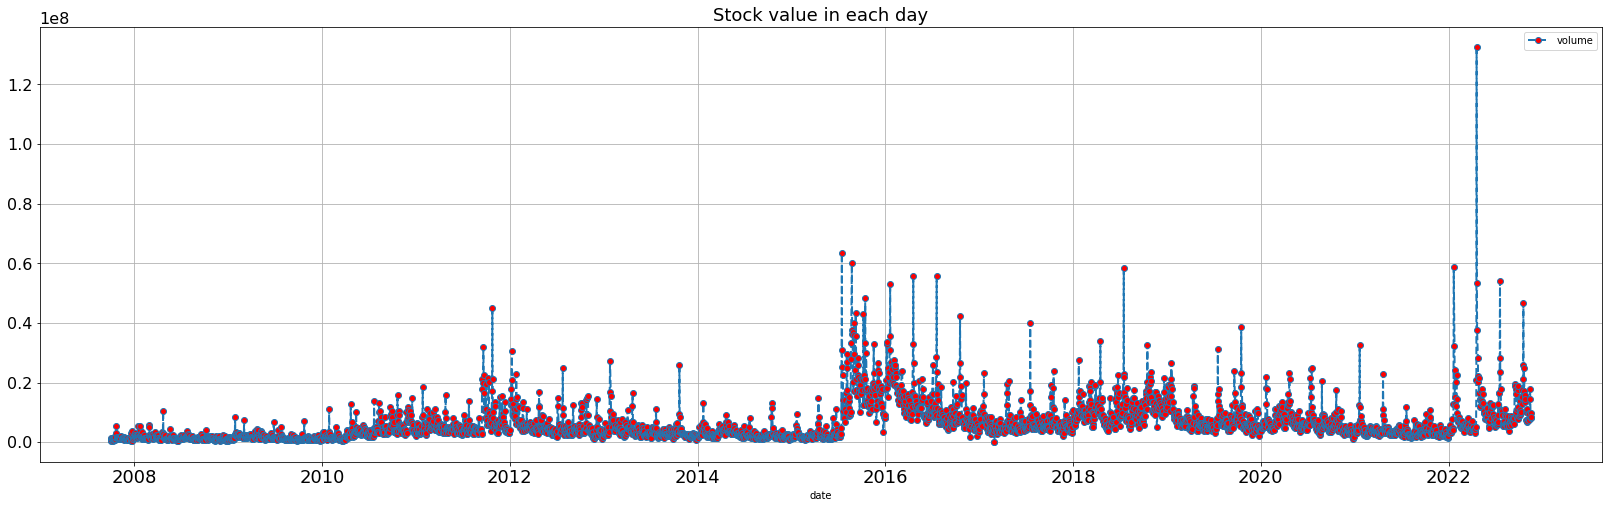

In [12]:
df2[['volume']].plot(figsize = (28,8),linewidth = 2, legend=True, linestyle='--', marker='o', markerfacecolor='r')
plt.title("Stock value in each day" ,fontsize = 18)
plt.xticks(rotation = 0)
plt.grid()
plt.show()

1. **Observation** Rolling Moving Average of opening stock price,closing stock price ,highest stock price of the day, lowest stock price ,Adj_stock
1. Prediction based one the last 20 day moving avearge is very close to noise of the pattern, it may show to be good agreement of the result

In [13]:
clm = df2.keys()

## [3] Corelation betweeen stock price and stock volume 

In [14]:
df2[["open","volume"]].corr()

,open,volume
open,1.000000,-0.034386
volume,-0.034386,1.000000


<AxesSubplot:>

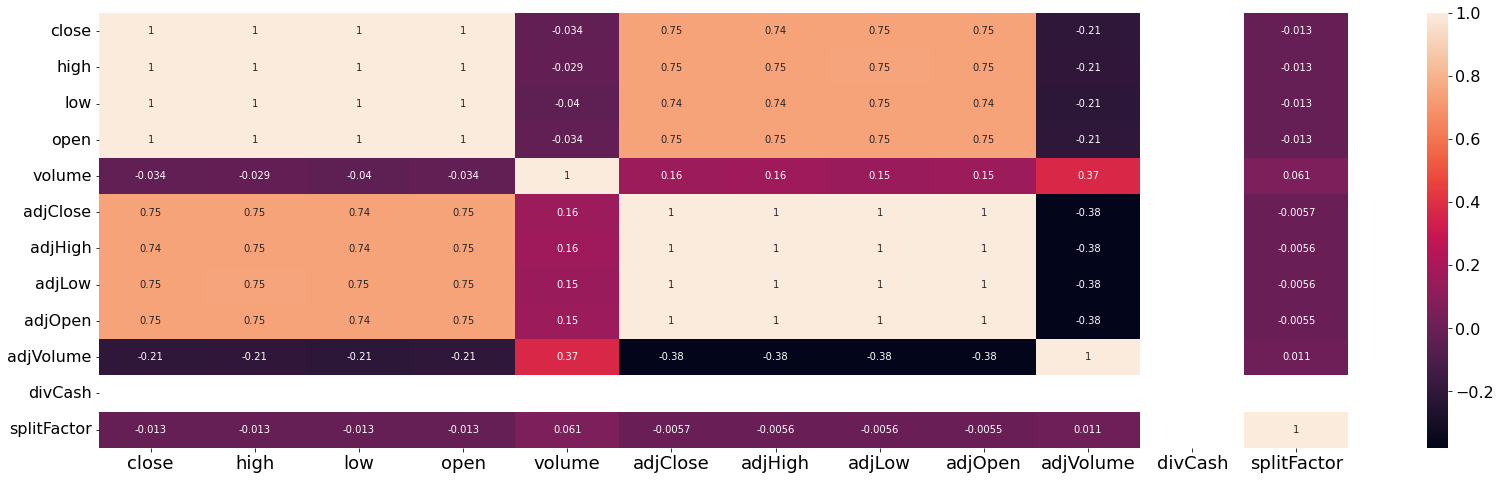

In [15]:
plt.figure(figsize = (28,8))
sns.heatmap(df2[list(clm)].corr() ,annot=True)

### Observation

* Based on the above plot it is easly see that pearson corealtion between actual price ['close', 'high', 'low', 'open',]  and stock volume is inversaly proposnal 
1. Means as stock price goes down stock buyer incresed the purchasing capacity
2. Split Factor which is shows 0.061 peak value among all of them coresponfding to the  stock volume Means contibution of share holer incresing whcih make sence number of ditribution increses.

## [4] What was the daily return of the day

We have done our baseline prediction let we move for little bit in depth, we moving for Risk analysis of the stock, In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the 1stock.

In [16]:
df2["closing_Percentage_change"] = df2['close'].pct_change(periods= 1)*100

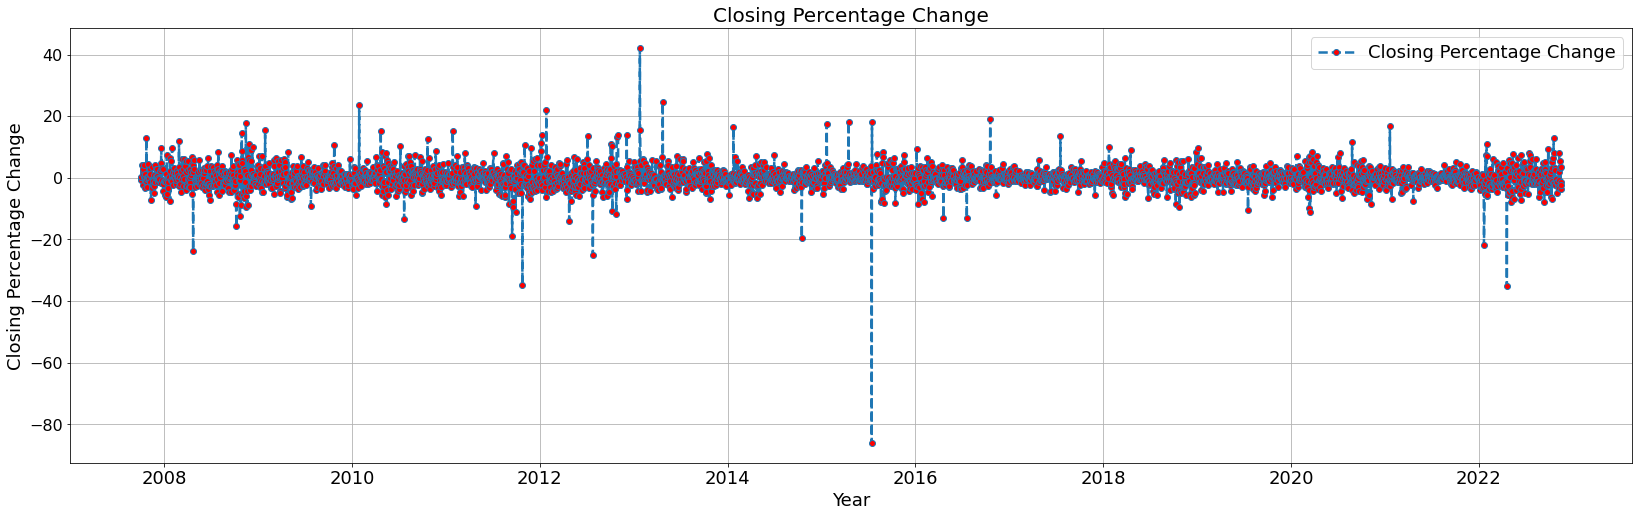

In [17]:
df2["closing_Percentage_change"].plot(figsize = (28,8), legend=True, linestyle='--', marker='o', markerfacecolor='r',linewidth = 2.5)
plt.title("Closing Percentage Change",fontsize = 20 )
plt.legend(["Closing Percentage Change"],fontsize = (18))
plt.xlabel("Year",fontsize = (18))
plt.ylabel("Closing Percentage Change",fontsize = (18))
plt.grid()
plt.show()

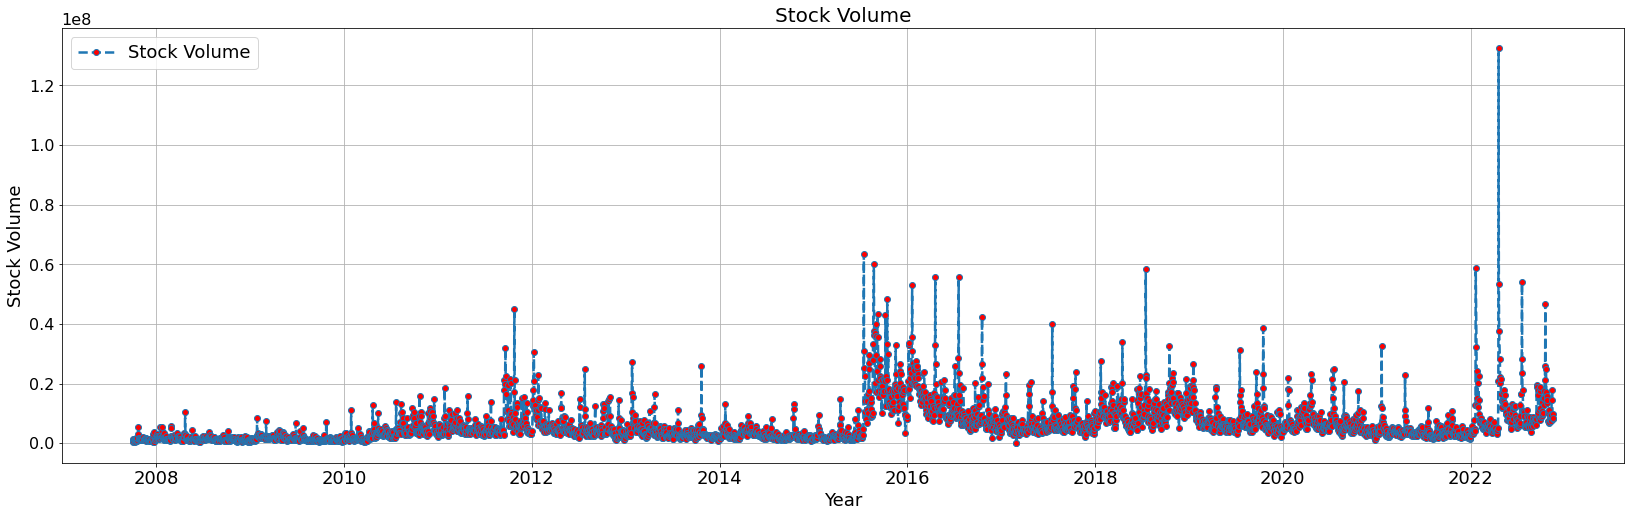

In [18]:
df2["volume"].plot(figsize = (28,8), legend=True, linestyle='--', marker='o', markerfacecolor='r',linewidth = 2.5)
plt.title("Stock Volume",fontsize = 20 )
plt.legend(["Stock Volume"],fontsize = (18))
plt.xlabel("Year",fontsize = (18))
plt.ylabel("Stock Volume",fontsize = (18))
plt.grid()
plt.show()

## [5] What was the peak return share price/day till now ?

In [19]:
temp0 = df2.sort_values(by = "closing_Percentage_change" , ascending  = False)[0:25]      # extracting Top 25 percentage of Return 
temp0.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,closing_Percentage_change
date,,,,,,,,,,,,,
2013-01-24,146.86,149.17,139.62,143.99,16972200,20.979979,21.309979,19.945694,20.569979,118805518,0.0,1.0,42.223513
2013-04-23,216.99,219.38,209.51,215.57,16408700,30.998540,31.339969,29.929970,30.795683,114861014,0.0,1.0,24.442278
2010-01-28,63.04,63.85,60.73,61.69,11050400,9.005705,9.121419,8.675706,8.812848,77352877,0.0,1.0,23.680596
2012-01-26,116.01,119.37,112.06,113.90,22706300,16.572841,17.052840,16.008555,16.271412,158944258,0.0,1.0,22.064394
2016-10-18,118.79,119.82,116.50,116.63,42168221,118.790000,119.820000,116.500000,116.630000,42168221,0.0,1.0,19.028056


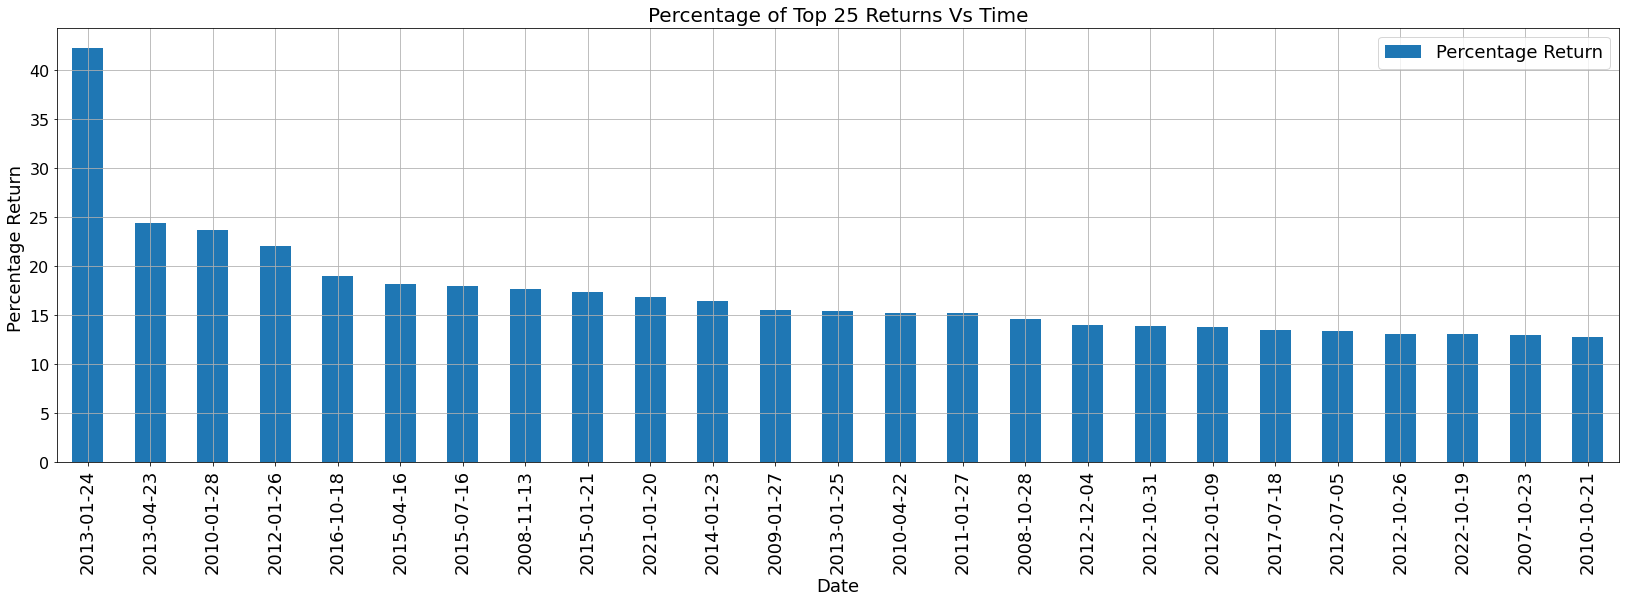

In [20]:
temp0[["closing_Percentage_change"]].plot(kind ="bar",figsize = (28,8))
plt.grid()
plt.title("Percentage of Top 25 Returns Vs Time",fontsize = 20 )
plt.legend(["Percentage Return"],fontsize = (18))
plt.xlabel("Date",fontsize = (18))
plt.ylabel("Percentage Return ",fontsize = (18))
plt.show()

In [21]:
df_max =  pd.DataFrame()
df_max["Peak % of Return"]    = df2["closing_Percentage_change"].sort_values(ascending  = False)[0:25]

In [22]:
plt.figure(figsize = (28,8))
fig = px.scatter(df_max, y='Peak % of Return',size="Peak % of Return",color="Peak % of Return",)
iplot(fig,auto_play=True)

<Figure size 2016x576 with 0 Axes>

In [23]:
df_min  = df2.sort_values(by ="closing_Percentage_change" ,ascending  = True)[0:25]

### [6]  Looking for minimum % of close Loss in closing price

In [24]:
plt.figure(figsize = (28,8))
fig = px.scatter(df_min[["closing_Percentage_change"]], y="closing_Percentage_change",color="closing_Percentage_change")
iplot(fig,auto_play=True)

<Figure size 2016x576 with 0 Axes>

## Observation 
1. Minimum Down stock price is observe in the July Year 2015 i.e -86.003 with in the one day interval 

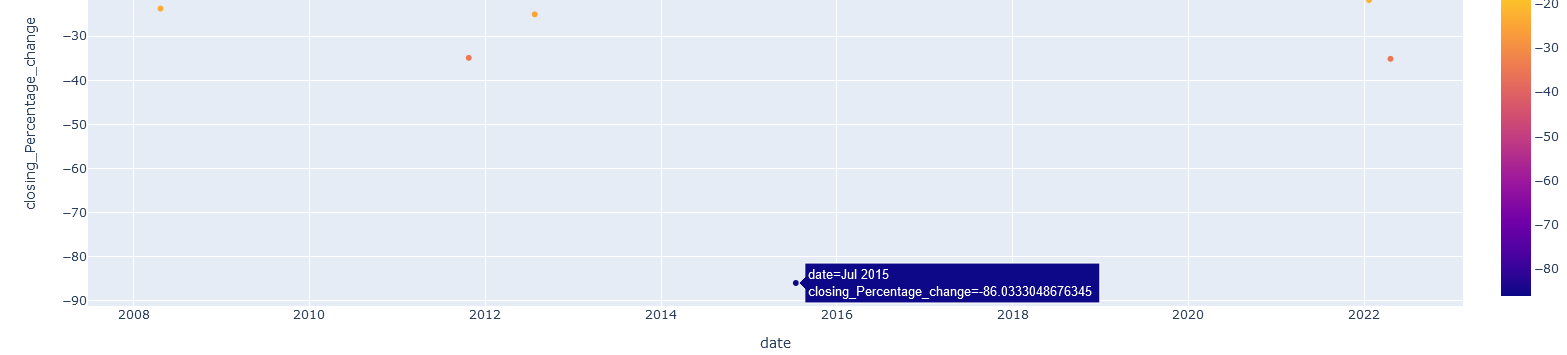

### [7] Looking for Maximum Stock Volume till Today 07|011|2022

In [25]:
df_min_vol= df2.sort_values(by="volume", ascending=True)

In [26]:
plt.figure(figsize = (28,8))
fig = px.scatter(df_min_vol, y='volume',size="volume",color="volume")
iplot(fig,auto_play=True)

<Figure size 2016x576 with 0 Axes>

### [8] The amximum stock in the April 2022 [132M+] maximum Stock is observe 
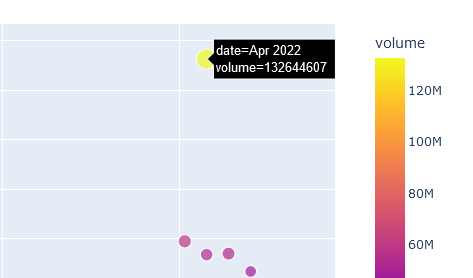

In [27]:
import datetime as dt

In [28]:
data_close =[]
for i in range(7,9):
    startdate = pd.to_datetime(f"200{i}-01-01").date()
    enddate = pd.to_datetime(f"200{i+1}-01-01").date()
    data0 =df_copy.loc[startdate:enddate]['close']
    df_data0 = pd.DataFrame(data0).reset_index()
    df_data0[f'date_month200{i}'] = pd.DatetimeIndex(df_data0['date']).month
    df_temp = df_data0.drop(columns= 'date',axis = 1)
    df_temp.rename(columns = {'close':f'close200{i}'}, inplace = True)
    data_close.append(df_temp)

In [29]:
for i in range(10,22):
    startdate = pd.to_datetime(f"20{i}-01-01").date()
    enddate = pd.to_datetime(f"20{i+1}-01-01").date()
    data0 =df_copy.loc[startdate:enddate]['close']
    df_data0 = pd.DataFrame(data0).reset_index()
    df_data0[f'date_month20{i}'] = pd.DatetimeIndex(df_data0['date']).month
    df_temp = df_data0.drop(columns= 'date',axis = 1)
    df_temp.rename(columns = {'close':f'close20{i}'}, inplace = True)
    data_close.append(df_temp)

### [9]  ## In which month of any year from 2007 to 2022 is the shareholder more active in purchasing and selling the share?

In [30]:

df_data1 = pd.DataFrame(df2).reset_index()
df_data1["month"] = pd.DatetimeIndex(df_data1['date']).month

month_stock_vol  = []
year_list = pd.DatetimeIndex(df_data1['date']).year.unique()
for yr in year_list :
    temp3 = df_data1[pd.DatetimeIndex(df_data1['date']).year==yr]
    temp4 = pd.DataFrame()
    temp3["month"] = pd.DatetimeIndex(temp3['date']).month

    for i in range(1,12+1) :
        month_stock_vol.append( temp3[temp3["month"]==i]["volume"].sum())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Month wise data extraction form the Dataset 

In [31]:
temp4 = pd.DataFrame([month_stock_vol[0:12],
month_stock_vol[12:24],
month_stock_vol[24:36],
month_stock_vol[36 :48],
month_stock_vol[48 :60],
month_stock_vol[60 :72],
month_stock_vol[72 :84],
month_stock_vol[84 :96],
month_stock_vol[96 :108],
month_stock_vol[108:120],
month_stock_vol[120:132],
month_stock_vol[132:144],
month_stock_vol[144:156],
month_stock_vol[156:168],
month_stock_vol[168:180],
month_stock_vol[180:]]).T

temp4.rename(columns = {0:"stock_vol_2007",
              1:"stock_vol_2008",
              2:"stock_vol_2009",
              3:"stock_vol_2010",
              4:"stock_vol_2011",
              5:"stock_vol_2012",
              6:"stock_vol_2013",
              7:"stock_vol_2014",
              8:"stock_vol_2015",
              9:"stock_vol_2016",
              10:"stock_vol_2017",
              11:"stock_vol_2018",
              12:"stock_vol_2019",
              13:"stock_vol_2020",
              14:"stock_vol_2021",
              15:"stock_vol_2022"}, inplace = True,
            index = {0:"January", 
                            1:"February",
                            2:"March",
                            3:"April",
                            4:"May", 
                            5:"June",
                            6:"July",
                            7:"August",
                            8:"September",
                            9:"October", 
                            10:"November", 
                            11:"December"})
temp4

,stock_vol_2007,stock_vol_2008,stock_vol_2009,stock_vol_2010,stock_vol_2011,stock_vol_2012,stock_vol_2013,stock_vol_2014,stock_vol_2015,stock_vol_2016,stock_vol_2017,stock_vol_2018,stock_vol_2019,stock_vol_2020,stock_vol_2021,stock_vol_2022
January,0,52246800,37239100,46301300,108770300,261331800,141701300,85774100,60846647,488193128,182188811,226315174,306630336,168074372,139998993,241496528
February,0,37921300,40397800,30712600,105283200,143239100,107938800,45340600,29957829,389268936,87621026,180222504,148192110,114109315,61545689,150981606
March,0,36372500,47667800,27231500,141193100,116380100,74344100,53891400,46838521,311298972,106572265,260507993,144841905,201974491,90187968,119130359
April,0,44230600,45959500,68868500,111997100,120322000,122076600,92657900,72638621,340174277,149459734,262064417,165087220,225161942,111580464,402229557
May,0,32923200,37316600,76262700,96884000,112694400,76684000,74833900,40004097,265066427,114553205,142051114,125298454,135055446,66932689,251505649
June,0,22090600,39281100,72787800,87639400,71344500,58948100,50380000,67037351,218261920,134019677,244032001,111051934,117293703,78536070,192596138
July,0,40259600,37684800,77296600,102389500,141149300,77560100,61405600,266271497,320137989,176027440,305487432,196691550,232102398,77194388,270098156
August,0,26456000,21725600,123317000,91512100,85858400,59548400,39182700,469605799,182611315,133570518,213144082,137336106,116258856,54707801,152260437
September,0,27578500,26907500,121866700,239941200,91304500,55265400,38306261,496545738,169724435,109725318,170832156,176233042,118814502,82338296,233874981
October,32987800,35350800,31587100,124762900,241583300,159187800,120065200,83355312,446442151,274097791,202226058,363589920,234943732,154319302,98581620,335299232


In [32]:
plt.figure(figsize = (28,8))
px.bar( temp4,orientation="h")

<Figure size 2016x576 with 0 Axes>

## * In which month of any year from 2007 to 2022 is the shareholder more active in purchasing and selling the share?
1. From the plot, we can see that October month  showing high stock volume capacity means, stock training highly active in the October month
2. In the sequential layout, January, July, and April are the top trading month
3. and June and May are the weakest trading month of any year, with un 2007 to 2022 November

## [9] How much value do we put at risk by investing in a particular stock? 
1. There are different way to do it but most effective fallowed by litrature :-
* [code source : https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm ]

In [33]:
df_per = df2[["close"]].pct_change()

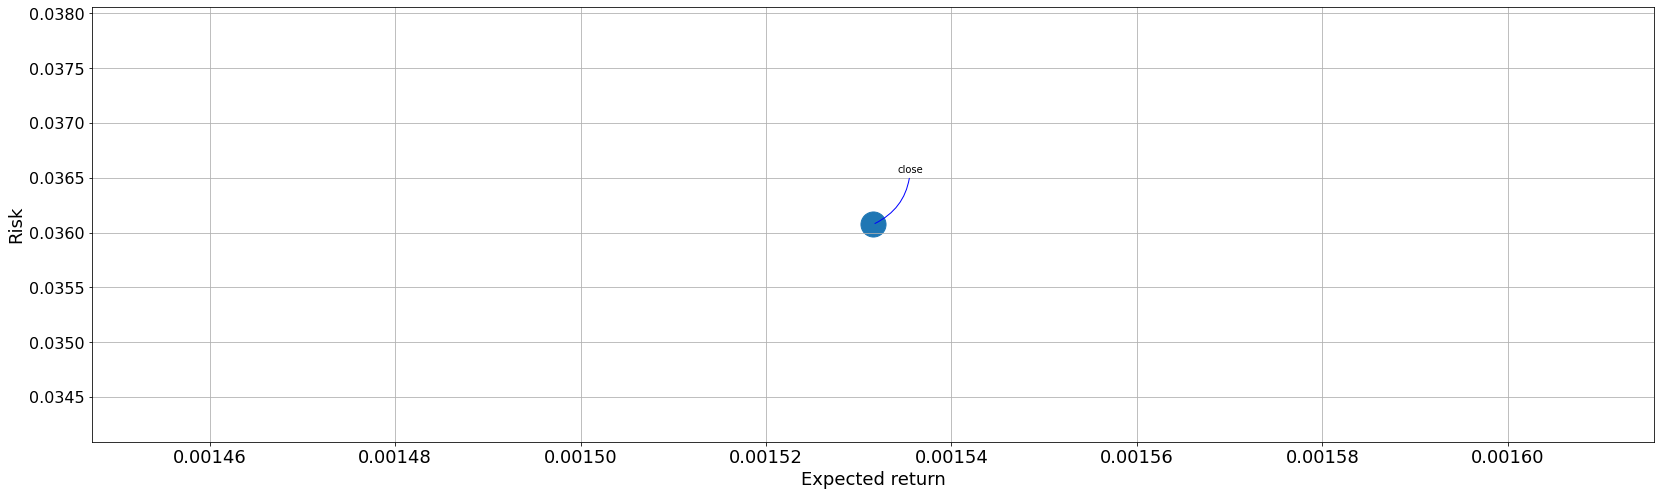

In [34]:
refs = df_per
rets = df_per.dropna()

area = np.pi * 200

plt.figure(figsize=(28, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return',fontsize = 18)
plt.ylabel('Risk',fontsize = 18)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))
plt.grid()
plt.show()

In [35]:
print("Percentage  of  Expected return :",rets.mean()*100 )
print("Percentage  of  Risk :",rets.std()*100)

Percentage  of  Expected return : close    0.153155
dtype: float64
Percentage  of  Risk : close    3.607579
dtype: float64


### Observation 
* From the above data, only one dataset has been used: Netflix, but when we have multiple datasets, we want to compare which company has the highest investment risk and Expected return.
* Here, the analysis makes a conclusion about the Netflix company
1. Risk = **0.036069 percent of investment**
2. expected return = **0.001508  percent of investment**


### [10] Prdiction of closing price for next days

In [36]:
df2.head()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,closing_Percentage_change
date,,,,,,,,,,,,,
2007-10-01,21.22,21.40,20.59,20.70,1361200,3.031426,3.057140,2.941426,2.957140,9528409,0.0,1.0,NaN
2007-10-02,21.20,21.33,20.76,21.25,646100,3.028568,3.047140,2.965711,3.035711,4522704,0.0,1.0,-0.094251
2007-10-03,21.08,21.28,20.80,21.02,516100,3.011426,3.039997,2.971426,3.002854,3612703,0.0,1.0,-0.566038
2007-10-04,21.14,21.27,20.77,20.88,699700,3.019997,3.038568,2.967140,2.982854,4897904,0.0,1.0,0.284630
2007-10-05,22.00,22.22,21.20,21.23,935600,3.142854,3.174283,3.028568,3.032854,6549206,0.0,1.0,4.068117


In [37]:
data = df.filter(['close'])
dataset = data.values
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3623

In [38]:
from  sklearn.preprocessing  import  MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0047559 ],
       [0.0047269 ],
       [0.0045529 ],
       ...,
       [0.41770702],
       [0.40213435],
       [0.39154958]])

In [39]:
train_data = scaled_data[0:int(training_data_len), :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.0047559 , 0.0047269 , 0.0045529 , 0.0046399 , 0.00588687,
       0.00627837, 0.00703235, 0.00794583, 0.00720635, 0.00733684,
       0.00872881, 0.00874331, 0.0091928 , 0.00883031, 0.00768483,
       0.00735134, 0.01167225, 0.01059927, 0.01071527, 0.01055577,
       0.01222324, 0.01232474, 0.01236823, 0.01210724, 0.01206374,
       0.01242623, 0.01347021, 0.01296272, 0.01341221, 0.01059927,
       0.0095263 , 0.01083127, 0.01000478, 0.00887381, 0.00849682,
       0.00764134, 0.00680035, 0.00523439, 0.00552438, 0.00511839,
       0.00637986, 0.00735134, 0.00751084, 0.00748184, 0.00846782,
       0.00842432, 0.00868531, 0.00864181, 0.00816332, 0.00804733,
       0.00777183, 0.00756884, 0.00739484, 0.00809083, 0.00748184,
       0.00904781, 0.01004828, 0.01348471, 0.01473168, 0.01445619])]
[0.015601664564211866]

[array([0.0047559 , 0.0047269 , 0.0045529 , 0.0046399 , 0.00588687,
       0.00627837, 0.00703235, 0.00794583, 0.00720635, 0.00733684,
       0.00872881, 0.00874331, 0.0

In [40]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [41]:
# Reshape the data frame
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)
print(y_train.shape)

(3563, 60, 1)
(3563,)


Models API
There are three ways to create Keras models:

1.     The **Sequential model**, which is very straightforward (a simple list of layers), but is limited to single-input, single-output stacks of layers (as the name gives away).
2.     The **Functional API**, which is an easy-to-use, fully-featured API that supports arbitrary model architectures. For most people and most use cases, this is what you should be using. This is the Keras "industry strength" model.
3.     Model **subclassing**, where you implement everything from scratch on your own. Use this if you have complex, out-of-the-box research use cases. [source: https://keras.io/api/models/]


* **Dence layer :** The layer that deeply connect the preceding layer, Means neuron layer are connected with the everylayer of preceding layer 
* **All About LSTM :** 

### [11] Model Formation

In [42]:
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout

* **‘add()’** function to add layers to our model. We will add four layers and an output layer.

* **‘Dense’** is the layer type. Dense is a standard layer type that works for most cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.

* We have 200 node one first layer and then 50 node in 2nd layer and 25 dence in the 3rd layer. This number can also be in the hundreds or thousands. Increasing the number of nodes in each layer increases model capacity.
* There is only one output layer thatis why we the Fourth layer consist the only one dence node

In [43]:
model = Sequential()                  # Use Api Model provide by the keras, use single inpuyt nad single output layer
model.add(LSTM(200,recurrent_activation = "sigmoid",return_sequences = True,input_shape =(x_train.shape[1],1) ))
# Here we use the 128 Neuron in First layer
model.add(LSTM(50,return_sequences =False))
# Here we use the 64 Neuron in Second layer
model.add(Dense(25))
# Here we use density of active layer is 25 in 3rd layer
model.add(Dense(1))
# Here we use density of active layer is 1 becsue the out put layer have only one 
model.compile(optimizer = "adam",loss = "mean_squared_error")

2022-11-21 20:03:25.675153: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [44]:
model.fit(x_train,y_train,batch_size = 10, epochs = 10,)  # Epoch nothing but number of iteration more number of layer make model over fit and less numbe number of layer make underfit 

2022-11-21 20:03:26.308899: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
357/357 [==============================] - 35s 88ms/step - loss: 0.0028
Epoch 2/10
357/357 [==============================] - 31s 87ms/step - loss: 0.0011
Epoch 3/10
357/357 [==============================] - 31s 88ms/step - loss: 8.7949e-04
Epoch 4/10
357/357 [==============================] - 31s 87ms/step - loss: 7.0018e-04
Epoch 5/10
357/357 [==============================] - 32s 89ms/step - loss: 6.3043e-04
Epoch 6/10
357/357 [==============================] - 31s 88ms/step - loss: 5.8687e-04
Epoch 7/10
357/357 [==============================] - 32s 89ms/step - loss: 5.3687e-04
Epoch 8/10
357/357 [==============================] - 31s 88ms/step - loss: 5.5552e-04
Epoch 9/10
357/357 [==============================] - 31s 88ms/step - loss: 5.3204e-04
Epoch 10/10
357/357 [==============================] - 31s 88ms/step - loss: 5.8415e-04


In [45]:
losses = pd.DataFrame(model.history.history)


<AxesSubplot:title={'center':'Sigmoid activation Function'}>

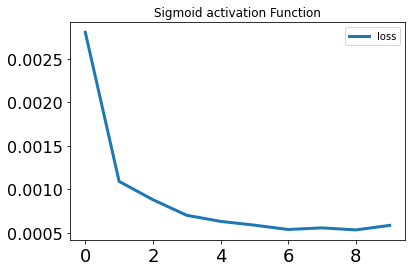

In [46]:
losses.plot(title ="Sigmoid activation Function")

Observation: 
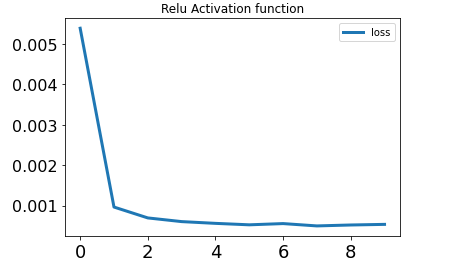

### [12] Model summary 

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 200)           161600    
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                50200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 213,101
Trainable params: 213,101
Non-trainable params: 0
_________________________________________________________________


### [13] Spliting the test data

In [48]:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len :,:]
for i  in  range(60,len(test_data)) :
    x_test.append(test_data[i-60:i,0])

In [49]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1] ,1 )  )

### [14] Output prediction : 

In [50]:
y_predict = model.predict(x_test)

In [51]:
y_predict = scaler.inverse_transform(y_predict)
rmse = np.sqrt(np.mean(((y_predict - y_test) ** 2)))
print( "Root Mean Squred Error : ",rmse )

Root Mean Squred Error :  13.351062535204553


In [52]:
## Shape of Predicted and Test dataset
print(y_predict.shape)
y_test.shape

(190, 1)


(190, 1)

### [15] Visulal plot for variation of the Predicted stock by traning the model and Expected

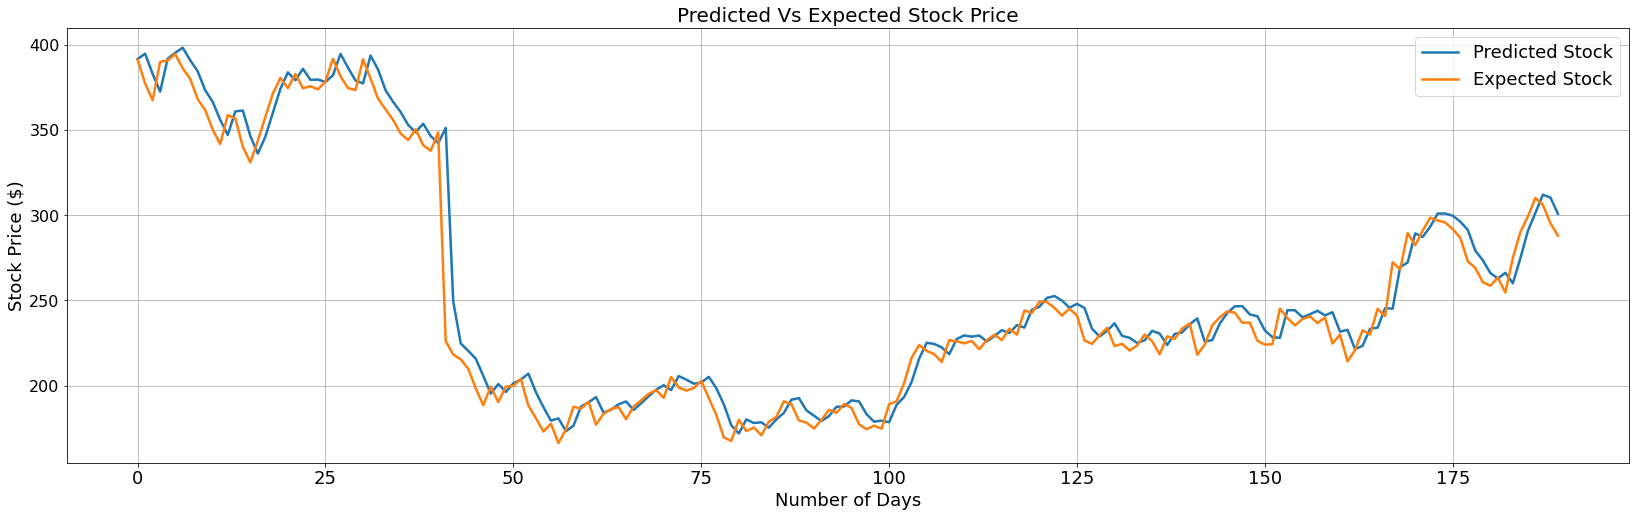

In [53]:
plt.figure(figsize = (28,8))
plt.plot(y_predict,markerfacecolor= "r",markersize=5,linewidth = 2.5)
plt.plot(y_test,markerfacecolor= "orange",markersize=5,linewidth = 2.5)
plt.title("Predicted Vs Expected Stock Price",fontsize = (20))
plt.legend(["Predicted Stock" ,"Expected Stock"],fontsize = (18))
plt.xlabel("Number of Days",fontsize = (18))
plt.ylabel("Stock Price ($)",fontsize = (18))
plt.grid()
plt.show()

In [54]:
# Dataset for next prediction 
data_for_train  = data[: training_data_len]
Validation_data = data[training_data_len :]
## Inserting predicted data in the validated dataframe 
Validation_data["prediction"] = y_predict

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



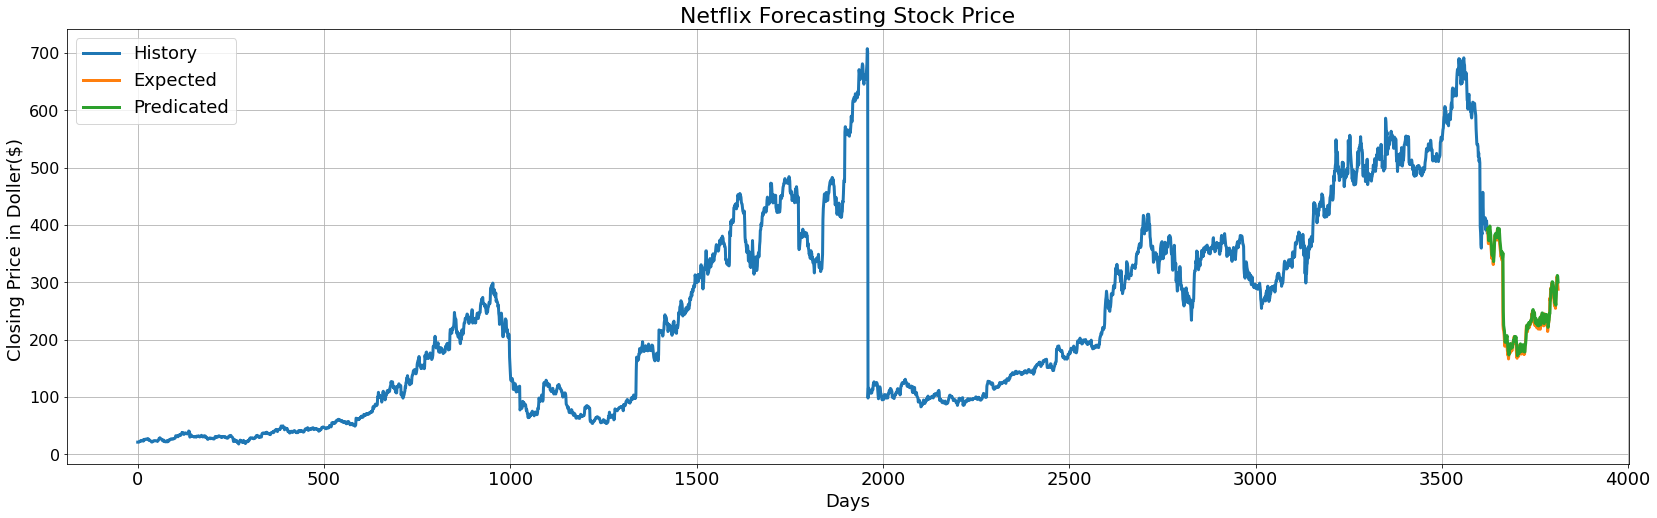

In [55]:
plt.figure(figsize =(28,8) )
plt.plot(data_for_train[["close"]])
plt.plot(Validation_data[['close', 'prediction']])
plt.title("Netflix Forecasting Stock Price",fontsize = 22)
plt.xlabel("Days",fontsize = 18)
plt.ylabel("Closing Price in Doller($) ",fontsize = 18)
plt.legend(["History","Expected","Predicated"],fontsize = 18)
plt.grid()

### Conclusion : 
* Stock price prediction of Netflix data from year 01 Jan 2007 to today to predict the future is performed for the next 60 day 
* Test size is created for 5% of the total dataset
* Train size consists the 95% of the Data
* Complete Dataset consists of 3803 rows and 12 columns 
* Netflix dataset downloaded from Tiingle Cryon, s o data have only 8 months missing value from Jan 2007 to Sep 2007 
* Dataset contains Several columns such as closing price, opening price, volume, etc.
* Data storage take takes zero kb storage because it is directly loaded from the Tiingle database using an API key
# which model you have been used?
* There is use for Rucurrent Neural Network for time series analsys by using the LSTM [Long Sort Term Memory]
* There we use the Adam Optimiser to optimze the weight of the output
* Use of sigmoid Activation Function usage the 2 hidden layer 
* There is only one input feature for prediction i.e. why use one dence function to predict the out put
* Loss Function There is use of mean squeared function to predict the output 
* Default Dropout inout rate is 0.2, means to prevent overfittig our model not going to run the 20% of input data deuring each epoch
model = Sequential()
model.add_layer(use of model ( Number of neurons , Activation Function ,input_shape =(Length of Training set,Number of feature ) )
### model.add(Droupout(rate= 0.2))  # It will restrict to model learn 20% of input so that model will go for overfit. 
* model.add(LSTM(128,recurrent_activation = "sigmoid",return_sequences = True,input_shape =(x_train.shape[1],1) ))
* model.add(LSTM(64,return_sequences =False))
* model.add(Dense(25))
* model.add(Dense(1))   #    Adding the one layer at output of layer
* model.compile(optimizer = "adam",loss = "mean_squared_error")   # this command make back propegation where the optimer is the back propegation



Why you use RNN with LSTM
# 